In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import (
    ExtraTreesRegressor, GradientBoostingRegressor, RandomForestClassifier
)

from sklearn.neural_network import MLPClassifier

import joblib

import torch
from torch import nn

In [42]:
save_model = False

In [3]:
%run '0_tools.ipynb'

In [4]:
word_dict = list(np.load(f'{train_vect_path}updated_word_dict.npy'))

### Which Classifier to Load

In [5]:
classifier = joblib.load(f'{saved_model_path}random_forest_3_classifier.joblib')

In [6]:
f = open(f'{desktop_path}CS_STUFF/Python/NLP/Political_Sentiment_Analysis/cnn.txt', encoding="utf8")
articles = f.read().split('     \n')
f.close()

In [7]:
print(len(articles))

829


In [8]:
print_for_training = False
print_all = False

In [9]:
manualSentiments = [-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,0,-1,1,-1,0,0,-1,-1,-1,0,-1,-1,0,0,-1,-1,1,-1,-1,0,0,-1,
                   1,-1,0,0,1,0,-1,1,-1,-1,-1,0,-1,-1,1,0,-1,0,-1,-1,-1,0,-1,-1,-1,-1,-1,1,1,0,0,1,0,1,1,0,-1,0,-1,1,
                   1,1,-1,-1,0,-1,0,-1,-1,0,0,-1,0,-1,1,0,-1,1,0,-1,1,-1,0,1,1,-1,1]

manual_len = len(manualSentiments)
print(manual_len)

104


In [10]:
if(print_all): index = 0
else: index = manual_len

In [43]:
if (print_for_training):
    
    df = pd.DataFrame([], [], ['Article'])

    article_num = index+1

    for article in articles[index:index+50]:
        print(f'{article_num})')
        print(article)
    #     s = sentiment(article, classifier)
        df.loc[len(df)] = np.array(article)
        print(str_line)
        article_num+=1

In [12]:
df['True Sentiment'] = None

In [13]:
df['True Sentiment'][:manual_len] = manualSentiments

Text(0.5, 1.0, 'Distribution of Manual Sentiments (all articles)')

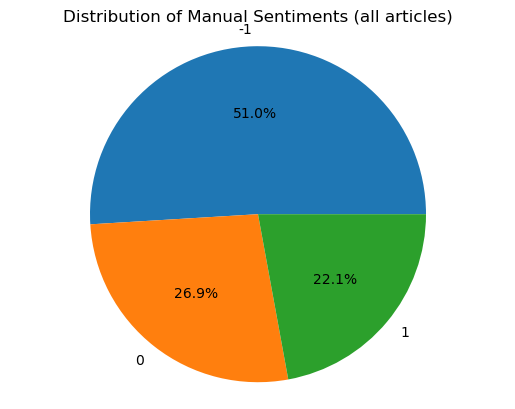

In [14]:
proportions = df['True Sentiment'].value_counts(normalize=True)
# print(proportions)
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Manual Sentiments (all articles)')

In [15]:
df['Vectors'] = df['Article'].apply(lambda x: vectorize(x, word_dict))

In [16]:
pos_df = df[df['True Sentiment']==1]
neutral_df = df[df['True Sentiment']==0]
neg_df = df[df['True Sentiment']==-1]

In [17]:
max_len = min(len(pos_df), len(neutral_df))

In [18]:
print(max_len)

23


In [19]:
pos_df = pos_df.head(max_len)
neutral_df = neutral_df.head(max_len)
neg_df = neg_df.head(max_len)

In [20]:
train_df = pd.concat([pos_df, neutral_df, neg_df], axis=0)

In [21]:
print(f'Train Size is {train_df.shape[0]} articles')

Train Size is 69 articles


Text(0.5, 1.0, 'Distribution of Manual Sentiments (train set)')

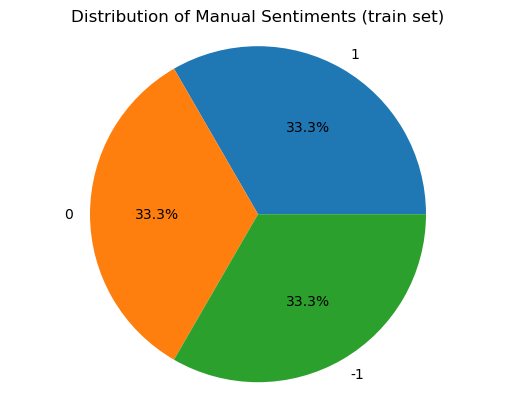

In [22]:
proportions = train_df['True Sentiment'].value_counts(normalize=True)
# print(proportions)
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Manual Sentiments (train set)')

In [23]:
X = train_df['Vectors'].tolist()
Y = train_df['True Sentiment'].tolist()

In [24]:
np_X = np.array(X)
np_Y = np.array(Y)

In [25]:
classifier.n_estimators

100

In [26]:
classifier.n_estimators = int(classifier.n_estimators * 1.25)
classifier.fit(np_X, np_Y)

RandomForestClassifier(n_estimators=125, random_state=12345)

In [27]:
classifier.score(np_X, np_Y)

1.0

In [28]:
manual_len

104

In [29]:
republicans = np.load(f'{desktop_path}CS_STUFF/Python/NLP/Political_Sentiment_Analysis/republicans.npy')
democrats = np.load(f'{desktop_path}CS_STUFF/Python/NLP/Political_Sentiment_Analysis/democrats.npy')

In [30]:
additionalGOP = ['donald', 'trump', 'ron']
additionalDems = ['joe', 'biden', 'democratic', 'crist', 'charlie', 'barack', 'obama', 'kamala', 'harris']

In [31]:
republicans = np.concatenate((republicans, np.array(additionalGOP)))
democrats = np.concatenate((democrats, np.array(additionalDems)))

In [32]:
both_parties = np.concatenate((republicans, democrats))

In [33]:
additional_skip_words = ['president', 'governor', 'senator', 'gov', 'gov.', 'sen', 'sen.', 'rep.', 'rep', 'michael',
                        'mike']

skip_words = np.concatenate((both_parties, np.array(additional_skip_words)))

In [45]:
GOP_preds = []
dem_preds = []

for article in articles[manual_len:]:
    new_article = article.split()
    try: party = new_article[len(new_article)-1]
    except: continue
        
    print()
    if (party == 'd'): print('Democrat Article')
    elif (party == 'r'): print('Republican Article')
    else: p = 'Error reading party'
        
    print()
    
    # preprocess article for sentiment analysis
    for i in range(len(new_article)-1):
        try:
            word = new_article[i]
            word = trimWord(word).lower()
            if (word in skip_words): 
                new_article.pop(i)
        except:
            continue
            
    new_article = ' '.join(new_article)
    
    # don't print party character at the end
    print(new_article[:len(new_article)-2])
    
    sent = sentiment(new_article, classifier)
    predicted = sentiment_to_num(sent[0])
    
    if (party == 'd'): dem_preds.append(predicted)
    elif (party == 'r'): GOP_preds.append(predicted)

    print()
    print(f'Predicted Sentiment: {sent[0]}.')
    print(str_line)


Democrat Article

The White House has engaged in talks with Elon Musk about the possibility of setting up SpaceX’s satellite internet service Starlink inside Iran, multiple officials familiar with the discussions told CNN. The conversations, which have not been previously reported, come as the administration searches for ways to support the Iranian protest movement that exploded just over a month ago after 22-year-old Mahsa Amini died under suspicious circumstances after being detained by the country’s morality police. The White House sees Starlink’s compact, easy-to-use technology as a potential solution to the Iranian regime’s aggressive efforts to restrict activists’ internet access and communications.

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

Joe said Friday that while he has not made a formal decision about running for reelection in 2024, it is his “inten


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

Federal courts on Thursday delivered two wins for Joe student loan forgiveness plan. Supreme Court Justice Amy Coney Barrett rejected a challenge to the program brought by a Wisconsin taxpayers group. And on the same day, a federal district court judge rejected a separate lawsuit brought by six Republican-led states. Student loan cancellations, worth up to $20,000 per eligible borrower, could show up on borrowers’ accounts as soon as Sunday. Lawyers for the government agreed in court documents to hold off on discharging any debt before October 23 as it faces several legal challenges. The appeal at issue in the Supreme Court case was considered an uphill battle because lower courts had ruled that the group, the Brown County Taxpayers Association, did not have the legal right or “standing” to bring the challenge. Under no


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

The modern Party’s one non-negotiable value is this: the ruthless pursuit of power. Party leaders who recognize this prosper while those who hold principle over political advancement get swept away. The latest rising star to learn this lesson is Glenn A year ago, pundits were praising Virginia’s for finding a way to win a blue state while keeping ex-President Trump at arm’s length and for creating a campaign blueprint not based on outright election denialism. Yet on Wednesday, had an arm around Kari Lake, the new sensation and ultra-MAGA candidate in Arizona’s race. The nominee refused in a CNN interview on Sunday to commit to recognizing the result of her race if she doesn’t win and is running hard as a loyal member of the ex-President’s election denial movement.

Predicted Sentiment: negative.
_______________________


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

As pollsters and political professionals alike attempt to divine which issue – or issues – will drive the outcome of the midterm elections, the internal White House view of the current dynamics isn’t exactly hidden. Joe schedule this week provides the roadmap in a less than subtle, real-time triage effort to fire up and stanch political bleeding on the economy. His push this week in some ways demonstrates the limits of his power, both on the policy and the politics. He remains at the mercy of an increasingly fragile international economy, major ground war in Europe and a global oil market turned on its head by OPEC+ earlier this month. Major campaign rallies are virtually non-existent, with across battleground states and districts wary of low approval numbers and choosing to take advantage of the fundraising prowess ins


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

The Department of Interior on Tuesday announced it will hold a lease sale for wind energy off the coast of Central and Northern California, bringing the administration’s dream of a massive West Coast wind farm one step closer to reality. The Pacific has enormous potential to generate wind energy, administration officials told reporters in a call last month, and this yet-untapped potential is a major part of Joe clean energy goals. Floating offshore wind turbines could unlock up to 2.8 terawatts of clean energy in the future – more than double the country’s current electricity demand, US Energy Secretary Jennifer Granholm estimated during the September call. The department will open five lease areas for companies to bid on near Morro Bay and Humboldt County on December 6. The space that will be offered is more than 373,0


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Arizona gubernatorial nominee Kari Lake showed Sunday how a new generation of Trump protégés are using the former anti-democratic playbook to taint another election. Lake appeared on CNN’s “State of the Union,” days after the House select committee investigating the January 6, 2021, insurrection aired fresh evidence that knew he lost in 2020 but was determined to declare victory anyway. Her responses made clear that strategy of casting doubt on the result even before ballots are cast is a legitimate tactic in the eyes of some office seekers two years later.

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

When the Supreme Court handed down its landmark decision overturning Roe v. Wade in late June, h


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Just try keeping track of the dizzying web of legal issues confronting or somehow involving former Donald and his allies, all of which he lumps into the category of “witch hunt.” Here are some of the major developments this week: There’s another case on the horizon:

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

The administration authorized an additional $725 million dollars in security aid for Ukraine Friday, as the country recovers from Russia’s recent barrage of missile attacks on civilian targets. The Presidential Drawdown includes “munitions, arms and equipment from US Department of Defense inventories,” Secretary of State Antony Blinken said in a statement Friday. The additional assistance br


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Trump Jr., a top executive at the Organization, told New York investigators that he was not involved in preparing the real estate company’s financial statements at the center of a $250 million lawsuit and that his knowledge of accounting rules is limited to a college course, according to excerpts of his deposition released Thursday. Excerpts of the testimony from Jr., former Donald and others were included in the New York attorney general’s motion Thursday asking a state judge to grant a preliminary injunction to prevent the Organization from continuing to use what investigators have alleged are fraudulent financial statements unless disclaimers are added and bar the company from shifting assets unless court approved. CNN has previously reported that the former asserted his Fifth Amendment right against self-incrimina


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

A US district judge could decide soon whether to temporarily block Joe student loan forgiveness program from taking effect after hearing a motion for a preliminary injunction on Wednesday. Six Republican-led states filed a lawsuit last month challenging the legality of the policy and are asking the court to grant a preliminary injunction, which could put student loan cancellation on hold until the judge issues a final ruling on the case. The Department of Education is expected to open an application for the student loan forgiveness program this month. The administration, which released a preview of the application Tuesday, aims to deliver debt relief worth up to $20,000 to millions of borrowers before federal student loan payments resume in January after a nearly three-year, pandemic-related pause.

Predicted Sentiment:


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

Joe on Tuesday cast the Supreme Court as more of an “advocacy group these days” than an “even handed” court, as he continues his vocal opposition to the conservative-dominated bench. “I view this off-year election as one of the most important elections that I’ve been engaged in because a lot can change because the institutions have changed. The Supreme Court is more an advocacy group these days than it is an even handed” court, the said during a virtual fundraiser for Rep. Lisa Blunt of Delaware. For the first time, said, Americans are concerned “about whether we can keep our democracy.”

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

In the final month of the midterm election season, candidates have


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

A shooting that wounded two teenagers on the property of Lee Zeldin, the nominee for of New York, was a disturbing development in a campaign that has seen him hammer Gov. Kathy over public safety and a controversial bail reform law enacted more than three years ago. The random incident Sunday afternoon outside his Long Island house – his two 16-year-old daughters were inside, terrified but uninjured – provided Zeldin with an opportunity, however personally unwelcome, to sharpen his message on an issue for which concerns cross party lines and potential solutions have often defied typical partisan divides. “This is day after day after day,” Zeldin told Fox News on Monday. “And there are a lot of parents, there are a lot of families, dealing with this reality of rising crime in New York. For us, fortunately, my daughters


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

OPEC+’s decision this week to slash oil production – and now the looming threat of higher gas prices – has pushed rhetoric into familiar territory: Joe green policies are making Americans pay more at the pump. in Congress have slammed attempts since he took office to curb new oil drilling in the US and grow the country’s clean energy infrastructure. A fresh volley of criticism came after this week’s OPEC+ move. In an interview with Fox Business, John of Wyoming said the administration is “attacking American energy.” Lisa of Alaska said in a statement Wednesday that the administration must “reverse course and work with our energy producers, instead of against them” to lower prices at the pump.

Predicted Sentiment: negative.
__________________________________________________________________________________________________


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

To learn that an American is talking so frankly about the possibility of nuclear “Armageddon,” as Biden did Thursday, is bone chilling. It’s also a commentary on the grave uncertainty over how Russian Vladimir Putin, a self-styled strongman, might react to the increasing possibility of defeat in Ukraine in a war to which he has nailed his political survival. remarks, at a fundraising event in New York, could open him to criticism by political opponents that he is speaking in an inartful way about nuclear war – and at a political fundraiser of all places. But they are paradoxically also a little reassuring because they reveal a who is deeply conscious of the risks of escalation with the volatile Kremlin leader.

Predicted Sentiment: neutral.
________________________________________________________________________________


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

There’s been lots (and lots) of press coverage of late focused on how nicely Florida Ron and Joe have managed to get along as they work to help the Sunshine State recover from the ravages of Hurricane Ian. But earlier this week, who has made a national name for himself in circles by attacking the likes of as well as the national media, sounded a discordant note in this kumbaya moment. “Quite frankly, you have national regime media that they wanted to see Tampa, because they thought that that’d be worse for Florida. That’s how these people think,” said in an interview with Florida’s Voice when asked about where the hurricane was projected to hit. “They don’t care about the lives here. If they can use it to pursue their political agenda, they will do it.”

Predicted Sentiment: positive.
_________________________________


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

This was an exchange that happened between Florida Sen. Rick Scott and CNN’s Dana Bash on “State of the Union” on Sunday, in the wake of former Donald saying Senate Leader Mitch had a “death wish” and referring to former Transportation Secretary Elaine Chao as “Coco Chow:” Bash: You’re a member of the Senate leadership. Are you OK with this? Scott: Well, look, I can never talk about and respond to why anybody else says what they said.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Sometimes you see a polling result that jumps out from the page. That was the case when I saw a recently released Gallup poll on who Americans think can better handle the issue that is most important to them. Put in a his


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Former Donald falsely claimed he had given the letters he exchanged with North Korean leader Kim Jong Un to the National Archives last year when he was interviewed by New York Times reporter Maggie Haberman for her forthcoming book, according to audio of the interview obtained by CNN. also claimed in his interviews with Haberman that he was not watching television while the January 6, 2021, riot at the US Capitol unfolded, which has been contradicted by testimony of White House aides to the House committee investigating the January 6 insurrection. Haberman’s book, “Confidence Man,” is being released on Tuesday. The book, which includes new details about time in the White House, chronicles how the former rise in the world of New York City politics and real estate in the 1970s and 1980s ultimately shaped his worldview a


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

The House of Representatives voted on Friday to approve a stopgap bill to fund the government through December 16, averting a shutdown just hours ahead of a midnight deadline when funding was set to expire. Joe signed the bill Friday afternoon. The Senate passed the measure on a bipartisan basis on Thursday. Lawmakers had expressed confidence there wouldn’t be a shutdown, but it is typical of Congress in recent years to run right up against funding deadlines.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

On Wednesday alone, two BIG articles about Florida Ron were published. The first, in The Spectator World, is a deep dive into childhood and his hometown of Dunedin. The second, written by the incom


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

House Minority Leader Kevin was asked on Tuesday about how he hadn’t yet condemned former Donald for having dinner a week ago with Nick Fuentes, a White nationalist and Holocaust denier. said, “I don’t think anybody should be spending any time with Nick Fuentes. He has no place in this Party. I think Trump came out four times and condemned him, and didn’t know who he was.” A reporter responded: “Well, he just said he didn’t know who he was. He didn’t condemn him or his ideology.”

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Former adviser Stephen Miller testified on Tuesday to a federal grand jury in Washington, DC, as part of the January 6, 2021, investigation, CNN has learned, making him the f


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

Kevin has a problem. He needs 218 votes to become the next speaker of the House when retake control of the chamber in January. And right now, he doesn’t have that number. Enter Kentucky James Comer, a ally. In an interview with NBC’s “Meet the Press” over the weekend, Comer sought to make the case for Here’s what he said:

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Waves of bitter attack ads are dominating Georgia’s airwaves as the runoff between Sen. Raphael and Herschel Walker enters its final week. Even with control of the Senate already secured, the stakes are high as seek to secure a majority outright instead of the power-sharing agreement currently in place. That has led to candidates and a


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Ex-magazine columnist E. Jean Carroll sued former Donald for battery and defamation under a new New York law that allows adults alleging sexual assault to bring claims years after the attack. Carroll filed the lawsuit Thursday, the first day that civil lawsuits can be brought under the new law, the Adult Survivors Act, which gives adults a one-year window to file a claim. The lawsuit is the second Carroll has brought against but the first to seek to hold him accountable for battery for allegedly raping Carroll in the dressing room of a New York department store in the mid-1990s. The lawsuit also alleges a new defamation claim based on statements made last month.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat 


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Three party committees on Tuesday asked the Georgia Supreme Court to halt Saturday early voting in the US Senate runoff. The petition – filed by the National Committee, the Georgia Party and the Senate campaign arm – asks the state’s high court to issue an emergency stay to block counties from offering voters the opportunity to cast ballots on the Saturday after Thanksgiving. In their petition, the committees argue that only 10 counties – “all of them Democratic-leaning” – plan to conduct early voting that day, “eviscerating the statutorily required uniformity among Georgia’s counties.”

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Ron has gotten a rock star’s reception at Party functions since wi


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Rep. Adam Kinzinger of Illinois lambasted House Minority Leader Kevin on Sunday, saying he does not think the California will last long if he’s elected House speaker next year. “I think he has cut so many deals with bad people to get to this position that I think he’s not going to be a leader at all. I think he’ll be completely hostage to kind of the extreme wings of the Party,” Kinzinger, who is retiring from Congress, told CNN’s Jake Tapper on “State of the Union.” “And I frankly don’t think he’s going to last very long.” “It’s sad to see a man that I think has so much potential, just totally sell himself – he’s the one that resurrected Trump the second he went to Mar-a-Lago, like a week or two after January 6,” added Kinzinger, a noted critic.

Predicted Sentiment: neutral.
__________________________________________


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Rep. Katie will win reelection in California’s 47th Congressional District, CNN projects, after facing a tougher-than-expected race against Scott Baugh. victory in the coastal Orange County district gives another House seat the next session – as of Friday morning, they had won 212 seats. But that won’t change CNN’s projection that will control the chamber in January. Five House races that could affect the partisan makeup of the chamber next year remain uncalled by CNN as of Friday morning. a former law professor, appeared to be among the best-positioned incumbents in California heading into the 2022 cycle because of her extraordinary fundraising prowess and her popularity nationally within the base after her fierce interrogations of Wall Street titans and administration officials at congressional hearings.

Predicted Sen


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Arkansas Gov. Asa Hutchinson is “very seriously” considering a 2024 presidential campaign, he told “CNN This Morning” on Thursday. “Absolutely. I’m looking at it – looking at it very seriously. After the midterm elections, it’s more intense, and it’s an accelerated review, and after going to Iowa, I’m encouraged that a who’s actually solved problems, who has a conservative common sense approach, can draw support and can be a good alternative. So, I’m encouraged by it,” Hutchinson told CNN’s Kaitlan Collins. Hutchinson also said that the midterm results weren’t a rejection of values but “it was a rejection of specific candidates. They were not focused on the problems of Americans.” Hutchinson, whose gubernatorial term ends in January and is term-limited from seeking the office again, pointed to that month as a “decision


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

If you’re looking for the most brutal treatment of Trump’s presidential announcement, look no further. The New York Post has won the title. In a story headlined “Been there, Don that” that ran on page 26 in print, the New York Post absolutely eviscerates the former The story was teased at the bottom of the front page with: “Florida man makes announcement.” (Shout out to Yahoo News’ Dylan Stableford for flagging!) A sampling of the article:

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

With his formal announcement of a third presidential bid, Trump now will face new limits on raising and spending money ahead of the 2024 election. But election lawyers and campaign finance experts said loopholes in


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

Facebook’s fact-checkers will need to stop fact-checking former Donald following the announcement that he is running for according to a company memo obtained by CNN. While is currently banned from Facebook, the fact-check ban applies to anything says and false statements made by can be posted to the platform by others. Despite ban, “Team a page run by political group, is still active and has 2.3 million followers. Tuesday’s memo from Meta underscores the challenges social media platforms face in deciding how to handle another presidential campaign. The former announced Tuesday night that he would seek the presidential nomination in 2024, aiming to become only the second commander-in-chief ever elected to two nonconsecutive terms.

Predicted Sentiment: neutral.
__________________________________________________________


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Former Vice Mike said in a newly released interview clip that he and his family are giving “prayerful consideration” to whether he should run for in 2024 and that the US will have “better choices in the future” than former Donald Asked by ABC News’ David Muir if he believes he can defeat who is expected to announce a 2024 campaign for the White House on Tuesday, replied: “Well, that would be for others to say, and it’d be for us to decide whether or not we’d want to test that.” And asked whether he believes his former boss should serve again as Pence said: “I think that’s up to the American people. But I think we’ll have better choices in the future. People in this country actually get along pretty well once you get out of politics. And I think they want to see their national leaders start to reflect that same, that s


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

A New York judge appointed retired Judge Barbara Jones to serve as monitor over the Organization after both the New York attorney general’s office and former Donald nominated her for the position. Judge Arthur Engoron said he spoke with Jones, who has served as special monitors in several high-profile investigations Monday and she confirmed she would accept the assignment. The judge said he will in a future order describe the scope of her duties and powers.

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

The Party is reeling after seeing its hopes of controlling the Senate in 2023 dashed and finding itself in a nip-and-tuck battle for the House majority. There are still several uncalled House races


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Joe and the Party have pulled off a midterm election for the record books. have retained the Senate – doing no worse than holding steady at 50 seats and potentially gaining one – and look likely to keep any net losses in the House in the single digits. Midterms are supposed to be the time for the opposition party to shine. That should especially be the case when there is once-in-a-generation inflation and when the vast majority of Americans think the country is on the wrong track.

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Gov. Larry Hogan of Maryland said Sunday that former Donald has cost the the last three elections and it’s past time to reassess what’s important to the party. “It’s basically


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

In a forthcoming memoir about his time on office, former Vice Mike recounts a conversation he had with Trump. Here’s the key bit, from an excerpt published in the Wall Street Journal on Wednesday: “Texas Louie Gohmert and other had filed a lawsuit asking a federal judge to declare that I had ‘exclusive authority and sole discretion’ to decide which electoral votes should count. ‘I don’t want to see Opposes Gohmert Suit’ as a headline this morning,’ the said. I told him I did oppose it. ‘If it gives you the power,’ he asked, ‘why would you oppose it?’”

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Tina will win the open gubernatorial race in Oregon, CNN projects, becoming one of the nation’s first o


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

Joe arrives Friday at the UN’s COP27 summit in Egypt with a climate change victory in-hand: a massive US law passed this year that experts have told CNN will go far to help transition the country to renewable energy. Inflation Reduction Act contained $370 billion for climate and clean energy tax credits and new programs – the largest climate-related investment in the country’s history and a significant statement that the US is back in the clean-energy race. But that law left out an important thing: international climate finance – funds to help poorer countries adapt to the climate crisis and grow their economies without becoming dependent on fossil fuel.

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article



Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

The administration will propose a rule this week requiring large federal contractors to develop carbon reduction targets and disclose their greenhouse gas emissions, leveraging the federal government’s purchasing power to combat climate change in the private sector and bolster vulnerable supply chains. Joe is expected to highlight the proposed action when he speaks Friday at the international COP27 climate summit being held in Egypt at the Red Sea resort Sharm El-Sheikh. The proposed rule would require companies that do more than $7.5 million annually in business with the government to set carbon reduction goals that line up with the Paris Climate Accord, which seeks to limit global warming by reducing emissions.

Predicted Sentiment: positive.
_____________________________________________________________________________


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

On the day of the 2022 general election, Trump sent a very clear 2024 message to DeSantis: Stay out of the race or else. “I would tell you things about him that won’t be very flattering – I know more about him than anybody – other than, perhaps, his wife,” said in an interview with Fox News Digital. a Florida resident, did say Tuesday that he had voted for for another term as

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

J.D. Vance will win the Ohio Senate race, CNN projects, outlasting a stronger-than-expected challenge from Tim Ryan and keeping the seat under control. Vance’s win is a boon for and a victory for former Donald whose endorsement in the primary helped Vance emerge from the content


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

are increasingly bullish on winning big in Tuesday’s midterm elections, as they slam over raging inflation and crime while Joe seeks a late reprieve by warning that election deniers could destroy democracy. The has considerable momentum in its bid to win back the House of Representatives while the destiny of the Democratic-run Senate will come down to a handful of knife-edge races. A triumph in either chamber would severely curtail domestic presidency and set up an acrimonious two years of political standoffs ahead of the 2024 White House race. In an exclusive interview with CNN, the potential next House speaker, Kevin laid out his plans for power and vowed to tackle inflation, border security and rising crime. He promised broad investigations against the administration on the Afghanistan withdrawal, the origins of th


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

David DePape – the man accused of attacking House Speaker Nancy husband, Paul one week ago – on Friday waived his appearance in a San Francisco Superior Court. A status hearing was set for November 28 and a preliminary hearing was set for December 14. DePape is charged with six counts relating to the attack including attempted murder, burglary, assault, false imprisonment and threatening the family member of a public official. He has pleaded not guilty to all state charges.

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

officials and strategists in New York tell CNN they are bracing for what could be stunning losses in the race and in contests for as many as four US House seats largely in the suburbs


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

A federal judge in Minnesota has rejected Lindell’s challenge to the FBI search and seizure of his phone in a 2020 election-related criminal probe. Judge Eric Tostrud said Lindell, CEO of My Pillow and a prominent backer of former Donald false voter fraud claims, had not shown that the search was unconstitutional, and said he could not have his phone returned or get more access to details from the search. “The Government has demonstrated a compelling interest in preventing the premature disclosure of search-warrant materials during its ongoing federal criminal investigation. Multiple factors here justify keeping the search warrant materials under seal,” the judge wrote.

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________



Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

The fight for control of the US Senate could come down to Georgia – again. For the second time in less than two years, the Peach State, which elected two senators in the last election cycle, is home to a contest that has gripped both national parties and potentially holds the key to the fate of Joe agenda. This time around, though, at least one key characteristic of the race has been reversed: Raphael has gone from challenger to incumbent, trying to fend off nominee Herschel Walker. The former football great, recruited and endorsed by former Donald has run an uneven campaign and spent the past month beset by controversy, but is still running neck-and-neck with with early voting in high gear and Election Day nearing.

Predicted Sentiment: positive.
_________________________________________________________________________


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

A new CNN national poll paints a very grim portrait of the electorate for with any number of warning signs that suggest the 2022 midterms are shaping up to be very tough for their side. I went through the data and pulled out five numbers that are particularly troubling for with just six days left before the election. 1) 42%: That’s Joe job approval rating among likely voters in the new poll, down from 46% in a CNN poll completed in September and early October. Even more concerning for should be the fact that while just 17% of likely voters strongly approve of the job is doing, a whopping 47% strongly disapprove – a major passion gap.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

A simmering conflic


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Members of the family are expected to be able to hear audio from the 911 call Paul placed to police and see body camera footage of officers who responded to his house the night he was attacked, a source familiar with the matter told CNN. placed a 911 call during last Friday’s attack after convincing the assailant to let him go to the bathroom, where his phone was charging, and he spoke cryptically to police. The body cam footage is expected to show what police saw when Paul opened the door and his assailant attacked him with a hammer, fracturing his skull. David DePape, the man accused of violently attacking last Friday, was arraigned in court Tuesday and he pleaded not guilty to a litany of state charges. He was released from a San Francisco hospital and moved to county jail on Tuesday, according to a spokesman from the


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

American politics is festering in violence, intimidation and inhumanity as another election looms amid escalating risks to political figures, all of which poses a grave threat to democracy. New details Monday of the assault on House Speaker Nancy husband strongly suggested the alleged assailant had a political motive and added to news reports that he engaged with social media conspiracies and election denialism. According to a federal affidavit, the accused, David DePape, who is due to be arraigned Tuesday, told investigators that he planned to kidnap the third-ranking federal official and break “her kneecaps” if she lied. In her absence, he said, her husband Paul ended up “taking the punishment instead” as he allegedly struck the 82-year-old on the head with a hammer, fracturing his skull.

Predicted Sentiment: neutral


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

Joe on Thursday signed a $1.7 trillion federal spending bill that includes a number of administration priorities and officially avoids a government shutdown, ending what he called a “year of historic progress.” “It’ll invest in medical research, safety, veteran health care, disaster recovery, (Violence Against Women Act) funding – and gets crucial assistance to Ukraine,” wrote in a tweet. He added: “Looking forward to more in 2023.”

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

The House January 6 committee on Thursday released a new batch of transcripts, including interviews with Trump Jr., former White House aides and others. The latest transcripts covered a range of topics and revealed new deta


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

A Maricopa County judge on Tuesday ordered Arizona Kari Lake to compensate Gov.-elect Katie for some legal fees related to the election lawsuit Lake had brought challenging her loss, but he stopped short of sanctioning Lake for filing the lawsuit. Judge Peter Thompson had rejected Lake’s lawsuit on Saturday, concluding that there wasn’t clear or convincing evidence of misconduct and affirming victory. It was a major defeat for Lake, who had lost to by about 17,000 votes and sued in an effort to overturn the election. She appealed that Christmas Eve ruling and will seek a direct review from the Arizona Supreme Court, according to a Tuesday afternoon filing. Attorneys for – the current secretary of state – had charged that Lake and her lawyers knew their challenges to the election could not be substantiated, which would v


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Shortly after the 2020 election was called for Biden, then-White House chief of staff Mark Meadows told his aide, Cassidy Hutchinson, that Donald knew he lost but wanted to keep fighting to overturn the results, according to a newly released transcript from the House select committee investigating the January 6 insurrection. The transcript of Hutchinson’s September 14, 2022, interview with the committee, which took place after she testified publicly, was released Thursday by the panel. It details post-election conversations that Hutchinson described, where multiple people said acknowledged he had lost but was unwilling to concede. Hutchinson testified that Meadows told her on November 18, 2020, that “has pretty much acknowledged that he’s lost,” the transcript says.

Predicted Sentiment: positive.
____________________


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

The administration has launched an expansive task force to investigate how US and western components, including American-made microelectronics, are ending up in Iranian-made drones Russia is launching by the hundreds into Ukraine, multiple officials familiar with the effort tell CNN. The US has imposed tough export control restrictions and sanctions to prevent Iran from obtaining high-end materials, but evidence has emerged that suggests Iran is finding an abundance of commercially-available technology. Last month, the UK-based investigative organization Conflict Armament Research examined several drones that had been downed in Ukraine and found that 82% of their components were manufactured by companies based in the US.

Predicted Sentiment: neutral.
_____________________________________________________________________


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

The administration is still bracing for the end of a Trump-era border restriction even after the chief justice of the Supreme Court temporarily paused the end of the program. The administration now faces a 5 p.m. ET Tuesday deadline to respond to an emergency appeal filed by Republican-led states that asked Chief Justice John Roberts to pause the end of Title 42. That authority allows the federal government to quickly expel migrants who have crossed the southern border, citing the Covid-19 pandemic. Roberts on Monday afternoon granted the temporary pause and ordered the administration to quickly respond. The White House had been spending Monday preparing for the end of the program at midnight on Wednesday in accordance with a lower court’s order. Border officials were thankful for the brief pause of the termination of T


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

A lawmaker on Sunday signaled confidence in House leader Kevin ability to capture the speakership and move forward even as a number of conservative hard-liners are threatening to upend his bid. Mike of Wisconsin told CNN’s Jake Tapper on “State of the Union” that “will get there, and I’m not budging off my support of Speaker “We can’t spend all of January … mired in this internal battle. We need to populate various committees. There’s all sorts of work that needs to be done,” he said.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

A special grand jury investigating efforts by former Donald and his allies to overturn the 2020 election in Georgia is winding down its work, according to sources famili


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

New Hampshire Chris makes one thing clear: His vision for the future of the Party does not include former Donald In the latest episode of “Being…”, the governor told CNN’s Dana Bash, “He’s done his time. He’s done his service. We’re moving on.” Taking it a step further, – who just won a fourth two-year term in the Granite State by 15 percentage points – said it’s “un-American” to “be a country where the best opportunity for our future leadership is the leadership of yesterday.”

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Three men were sentenced Thursday for providing material support for a terrorist act and two other state-level charges related to the 2020 plot to kidnap Michigan Gretchen accord


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Special counsel Jack Smith has issued a subpoena to local officials in Allegheny County, Pennsylvania, for information related to the 2020 election, a spokesperson for the county told CNN. “Yes, we received a subpoena from the Department of Justice’s special counsel regarding the 2020 election. We have nothing further to share or provide,” said Amie Downs, the county’s communications director. The subpoena sent to Allegheny County is the latest in a string of requests for information sent by Smith, who is now overseeing the Justice Department’s sprawling criminal investigation into efforts to overturn the 2020 election.

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

House Speaker Nancy official por


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

Joe signed into law Tuesday landmark new federal protections for same-sex and interracial couples, capping both a personal and national evolution on an issue that’s enjoyed growing acceptance over the past decade. signed the Respect for Marriage Act before thousands of invited guests on the South Lawn at an event the White House said reflected the importance of the moment. “Marriage is a simple proposition. Who do you love? And will you be loyal to that person you love?” the asked from the South Lawn. “It’s not more complicated than that.”

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

The House Conference is still entrenched in an internal war over whether to reinstate an arcane rule that would em


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

The US Department of Energy’s Loan Programs Office will announce Monday that it is issuing a $2.5 billion loan to help start three lithium battery manufacturing hubs in Ohio, Tennessee and Michigan. The DOE loan programs office will loan the money to Ultium Cells LLC, a joint venture of General Motors and South Korean battery manufacturer LG Energy Solutions making batteries to power electric vehicles. General Motors has pledged to go all-electric by 2035, phasing out conventional gas and diesel-powered engines. In a statement, US Energy Secretary Jennifer Granholm said the DOE loan would “jumpstart the domestic battery cell production needed to reduce our reliance on other countries to meet increased demand.”

Predicted Sentiment: neutral.
_________________________________________________________________________________


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Former Donald does not plan to appeal to the Supreme Court a lower court order that put an end to the special master review of documents seized from his Mar-a-Lago estate, a source familiar with the matter tells CNN. Last week, a federal appeals court ruled that a lower court judge had erred when she ordered the appointment of a third party, or special master, to review about 100 classified documents that investigators found when they searched his Florida home in August. The former legal team previously argued that they needed an outside expert to decide whether any of documents found at Mar-a-Lago could be privileged. They had until Thursday to appeal the decision to the Supreme Court.

Predicted Sentiment: negative.
______________________________________________________________________________________________________


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

The administration has decided to appeal a federal court decision that blocked the use of a controversial Trump-era policy allowing for the swift removal of migrants at the US-Mexico border. Last month, US District Judge Emmet blocked the authority, known as Title 42, but agreed to a administration request that he pause his ruling for five weeks so that the government can prepare to comply with it. Wednesday, the Justice Department told the court it planned to appeal.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

As White House officials reflected on the final victory of a history-defying midterm election cycle, one constant has been a sense of validation. For Joe the expanded Senate majority clinched


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Special counsel Jack Smith has subpoenaed local officials in Wisconsin, Michigan and Arizona for any and all communications with then-President Trump, his 2020 campaign and a number of aides and allies, multiple sources and county officials confirmed to CNN. The requests for records were received by officials in Wisconsin’s Dane County and Michigan’s Wayne County late last week, the sources said. Arizona’s Maricopa County and Wisconsin’s Milwaukee County also received subpoenas, county officials confirmed to CNN. The subpoenas request communications from these local officials with specifically, and from a list of several people who worked with or advised his campaign, the sources added. A copy of the subpoena sent to the Milwaukee County clerk seeks communications from June 1, 2020, through January 20, 2021, the day le

In [35]:
GOP_pred_df = pd.DataFrame(np.array(GOP_preds))
dem_pred_df = pd.DataFrame(np.array(dem_preds))

In [36]:
dem_pred_df[0] = dem_pred_df[0].astype(str).replace('-1', 'Negative').replace('0', 'Neutral').replace('1', 'Positive')
GOP_pred_df[0] = GOP_pred_df[0].astype(str).replace('-1', 'Negative').replace('0', 'Neutral').replace('1', 'Positive')

In [37]:
print(f"Total articles: {len(GOP_pred_df) + len(dem_pred_df)}")
print(f"Total Republican articles: {len(GOP_pred_df)}")
print(f"Total Democrat articles: {len(dem_pred_df)}")

Total articles: 723
Total Republican articles: 404
Total Democrat articles: 319


In [38]:
color_dict = {'Positive':'green', 'Negative':'red', 'Neutral':'gray'}

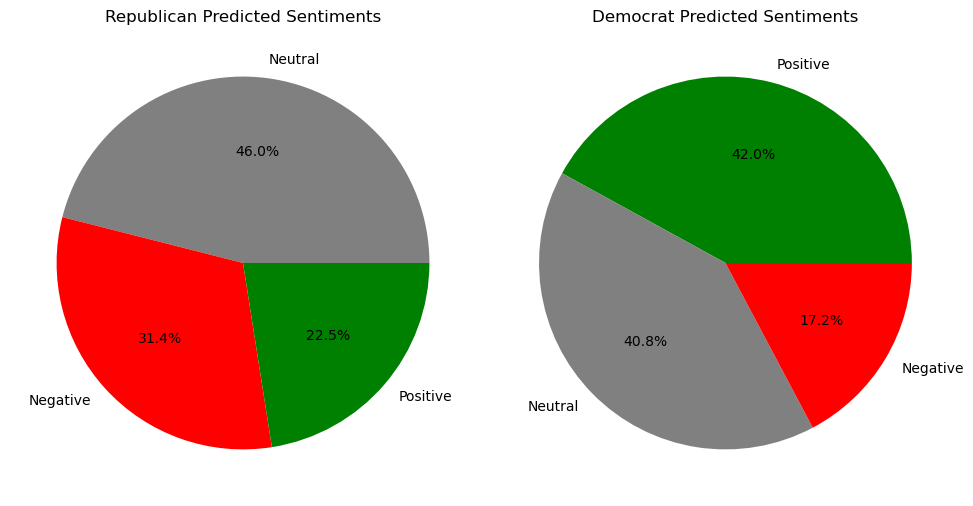

In [39]:
# create big plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# GOP subplot

GOP_proportions = GOP_pred_df[0].value_counts(normalize=True)

c = []
labels = GOP_proportions.index
for i in labels: c.append(color_dict[i])

axs[0].pie(GOP_proportions, labels=labels, colors = c, autopct='%1.1f%%')
axs[0].set_title('Republican Predicted Sentiments')

# dem subplot

dem_proportions = dem_pred_df[0].value_counts(normalize=True)

c = []
labels = dem_proportions.index
for i in labels: c.append(color_dict[i])
    
axs[1].pie(dem_proportions, labels=labels, colors = c, autopct='%1.1f%%')
axs[1].set_title('Democrat Predicted Sentiments')

# show big plot
plt.tight_layout()
plt.show()

In [40]:
if (save_model): 
    save_file = f'{saved_model_path}rf_political_classifier.joblib'
    joblib.dump(classifier, save_file)
    print(f'Successfully saved model to \n{save_file}')